In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [2]:
# Load the MNIST dataset (handwritten digits)
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
# Normalize pixel values (0-1 range)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
# Build an ANN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 image to 1D
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

C:\Users\avani\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Save the trained model
model.save("mnist_ann.h5")

print("Model trained and saved as 'mnist_ann.h5'")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8789 - loss: 0.4352 - val_accuracy: 0.9574 - val_loss: 0.1430
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9641 - loss: 0.1243 - val_accuracy: 0.9676 - val_loss: 0.1112
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9755 - loss: 0.0818 - val_accuracy: 0.9751 - val_loss: 0.0833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9822 - loss: 0.0591 - val_accuracy: 0.9755 - val_loss: 0.0808
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9871 - loss: 0.0433 - val_accuracy: 0.9722 - val_loss: 0.0908
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0355 - val_accuracy: 0.9750 - val_loss: 0.0837
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0278 - val_accuracy: 0.9770 - val_loss: 0.0773
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9925 - loss: 0.0239 - 

Model trained and saved as 'mnist_ann.h5'


In [7]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tkinter import Tk, filedialog

In [8]:
# Load pre-trained ANN model
try:
    model = tf.keras.models.load_model("mnist_ann.h5")
    print("Model loaded successfully!")
except Exception as e:
    print(f" Error loading model: {e}")
    exit()


Model loaded successfully!


In [9]:
# Function to select an image file
def upload_image():
    Tk().withdraw()  # Hide Tkinter root window
    file_path = filedialog.askopenfilename(title="Select an image", filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])
    return file_path if file_path else None

In [10]:
# Preprocessing function
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    if img is None:
        print("Error: Could not read image file.")
        exit()

    img = cv2.resize(img, (28, 28))  # Resize to 28x28
    img = cv2.bitwise_not(img)  # Invert colors (MNIST is black on white)
    img = img / 255.0  # Normalize pixel values
    img = img.reshape(1, 28, 28)  # Reshape for ANN model input
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


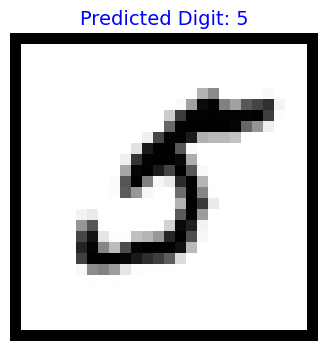

Prediction: The uploaded digit is 5


In [11]:
# Main execution
file_path = upload_image()

if file_path:
    img_processed = preprocess_image(file_path)

    # Make prediction
    prediction = model.predict(img_processed)
    predicted_digit = np.argmax(prediction)
    
    # Show the uploaded image and prediction
    plt.figure(figsize=(4, 4))
    plt.imshow(img_processed.reshape(28, 28), cmap="gray")
    plt.title(f"Predicted Digit: {predicted_digit}", fontsize=14, color="blue")
    plt.axis("off")
    plt.show()

    print(f"Prediction: The uploaded digit is {predicted_digit}")

else:
    print("No image selected.")
